# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [26]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
Observed that the smartcab is stationary during the simulation.

The agent is recieving positive rewards when traffic light is red, for idling.

The agent is recieving negetive rewards when the traffic light is green and no oncoming traffic, for not moving.

It seems that traffic light color is one of the factor that affecting the rewards the agent recieving. From the simulation observed, if the smartcab is not moving when the light is green, the agent recieves negetive rewards. Similarly, it received positive reward for not moving when the light is red. But the negetive reward for inaction at green light seems to be much higher than the positive reward for idling at red light.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
agent.py flags:

*learning* - If this flag is set, agent is suppose to learn using Q-learning algorithm. By default this flag is set to *False* so that it takes random actions. When the flag is set to *True*, the agent uses Q-learning to find optimal actions.

*epselon* - This flag controls *random exploration factor*. It controls how often the agent should take a random action as part of exploration instead of taking best known action based on Q-learning. If this value is too low agent may not learn new actions by exploring but just take best known action. If this value is too high, agent will not make use of its best learned actions but may always take random actions. Ideally a value in between may balance the exploration and exploitation.

*alpha* - This flag controls the *learning rate*. It determines to what extent the newly acquired information will override the old information. A value of '0' will make the agent learn nothing, while a value of '1' will make the agent consider only the most recent information. In fully deterministic environments, a value of '1' is optimal. But in stochastic environments, algorithm still converges under some technical conditions that requires thevalue to decrese to '0'. In practice, often a constant learning rate such as '0.1' is used. 

The *act()* member function from *environment* class is called when agent performs an action.

*render_text()* is used for the non-GUI render display of the simulation. Simulated trial data will be rendered in the terminal/command prompt. *render()* function is used for the full GUI render of the simulation based upon pygame.

*next_waypoint()* function seems to consider East-West direction 1st by evaluating 'dx' and the evaluates North-South by evaluating 'dy'.

reference: https://en.wikipedia.org/wiki/Q-learning#Learning_rate




-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


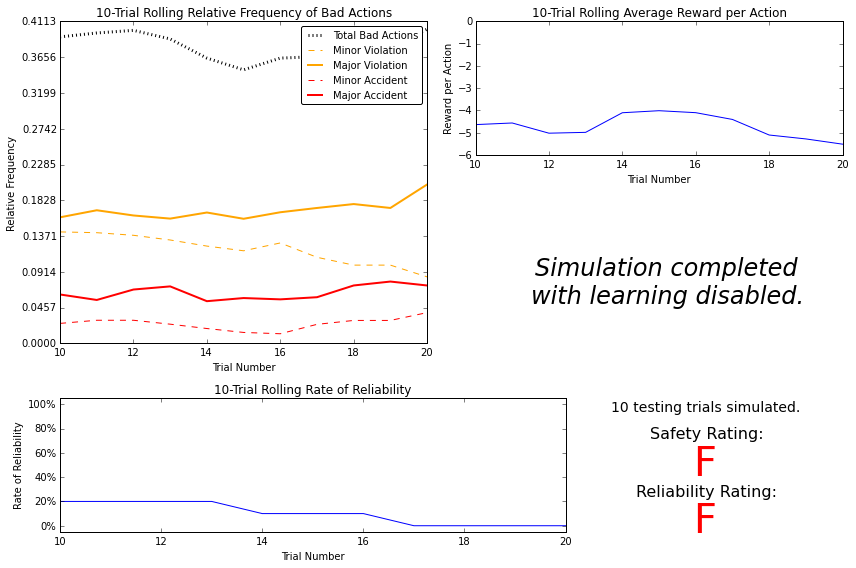

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

From the relative frequency of bad actions panel, we can see that the agent takes bad actions 40% of the time. In that, upto 8% of the time it causes major accident and a major violation upto 18% of the time.

Given that the agent is driving randomly, which means there is no learning involved to find the optimal actions for the agent to take, it makes sense that the reliability is below 20%  or the smartcab did not reach destination on time 80% of the time.

Average reward the agent recieved for all the trials is between -4 and -6 and there is no constant improvement seen with more trials. This seems to be normal since the agent is making random decisions and upto 40% of the time bad decisions. Which means that bad actions are penalized more but does not appear to be hevily penalized. 

It appears that the trials do not have any significant influance on the outcome of the results. Most of the trials have roughly similar results.

This smartcab is definitly not safe and reliable for its passengers considering the high number of accidents and major traffic violations it caused. 80% of the time not reaching destination on time is not at all reliable as well.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

**safety** - Input features like traffic light, intended next action of other vehicles around are very important featured for the agent to learn safety. For example, if the agent ignores traffic light condition, there is high chance of causing major accident when light is red and smartcab drives forward. So *light* is critical for learning safety.

When considering the intended action of other vehicles around, intended action of vehicle on the left, if there is one, is important when smartcab is considering a right turn on red. Because if there is a vehicle intended to move forward from the left and the smart cab takes action to turn right, it might cause accident. *oncoming* vehivcle from opposite side is also important when smartcab is intending to make left turn. If the agent does not check the intended action of oncoming vehicle and makes left turn, it might cause accident. Next, considering the intended action of vehicle on the right does not appear to be important for the agent because, if light is green, the smartcab has the right of way to move forward or turn left of there is no oncoming vehicle, vehicle on the right is suppose to be idle. So it does not give any extra information here. When smart cab considering to turn right, it only need to check for vehicle from left, action of vehicle on the right does not affect the smartcab, atleast in this simple scenario.

So 'light', 'left', 'oncoming' inputs are important for safety.

**efficiency** - I think it depends on how do we measure efficiency. Is it reaching destination always on time, or reaching destination within certain time window like , +/- 5minutes or +/- 10minutes etc. For this simple case, i'm considering reaching destination within a certain time window. Hence it is not necessary to use 'deadline' to learn efficiency, just the 'waypoint' should be sufficient. Knowing waypoint is very important for the smartcab to reach its destination efficiently because it is possible for the smartcab to take a long route that may reach destination taking longet time and consuming more energy.

So 'waypoint' is the important feature to consider for the agent to learn efficiency.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
I've selscted 4 features(light,waypoint,left, oncoming) in the previous question that are relevant for learning safety and efficiency. 'light' have 2 possible states(green and red). waypoint have 3 possible states(left, right, and forward). Vehicle on the left and oncoming have 4 possible states each(left, right, forward and None).

Total possible states combinations = 2 x 3 x 4 x 4 = 96

learning 96 possible states within a reasonable amount of time seems possible for the driving agent. 

But if we consider other 2 features ( right and deadline), there seems to be a huge number of possibilites that the agent may not be able to learn all states.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

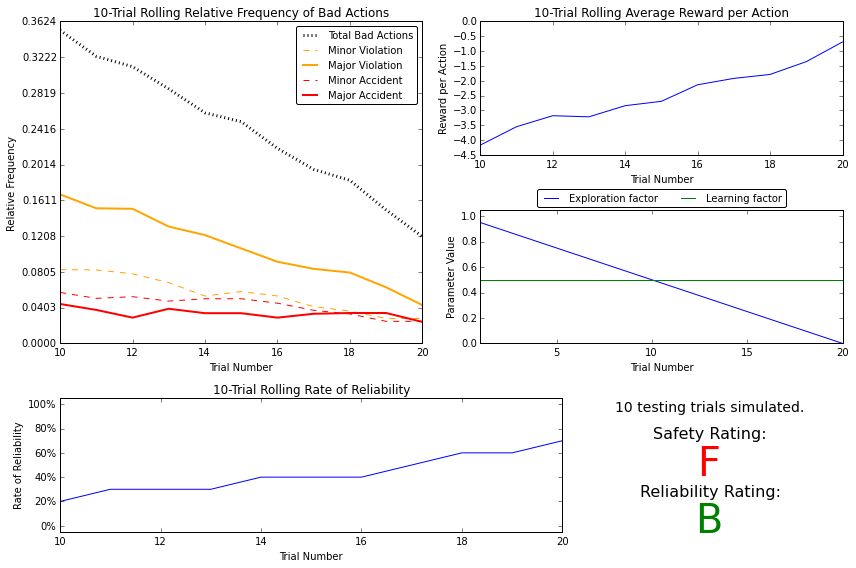

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
There are not much similarity observed between the basic driving agent and the default Q-Learning agent. A small similarity I observed is that the major accident is not showing much imrprovement after each trials, it stays approximately around 4% got Q-Learning agent,  7-8% for basic driving agent. Another similarity is both agents failed the 'Safety Rating'.

The agent took 20 training trials before testing. This makes sense the epsilon started with 1.0 and decreased 0.05 for each trials, so that it reached 20 training trials before it reached tolerance of 0.05.

The decaying function for epsilon is accurately represented, it can be seen from the exploration factor-learning factor chart that the exploration factor is consistantly reducing after each trials.

It can be seen from the chart that the relative grequency of bad actions dropped significantly as training trials increseed. Total bad actions were around 36% at trial 10 and it reduced to around 12% after 20 trials. As a result the reduction in bad actions, reward received by the agent also increased. The chart shows an average reward of around -4 at trial 10 and it improved to around -0.5 after 20 trials.

Based on the 10 testing trials both initial driving agent and Q-Learning agent failed Safety rating, that means the smart cab is not yet smart enough to make safe decisions. But the reliability rating for Q-Learning agent receieved a B rating compared to F rating for the initial driving agent. Hence it shows that the Q-Learning agent is learning, but not smart enough to achieve the best results.

As of now the smartcab is still not safe and efficient, but it shows improvement and is learning. With optimization and more training trials, the agent could probably learn to be safe and efficient.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

### Learning with alpha = 0.01, tolerance = 0.01, 50 testing trials

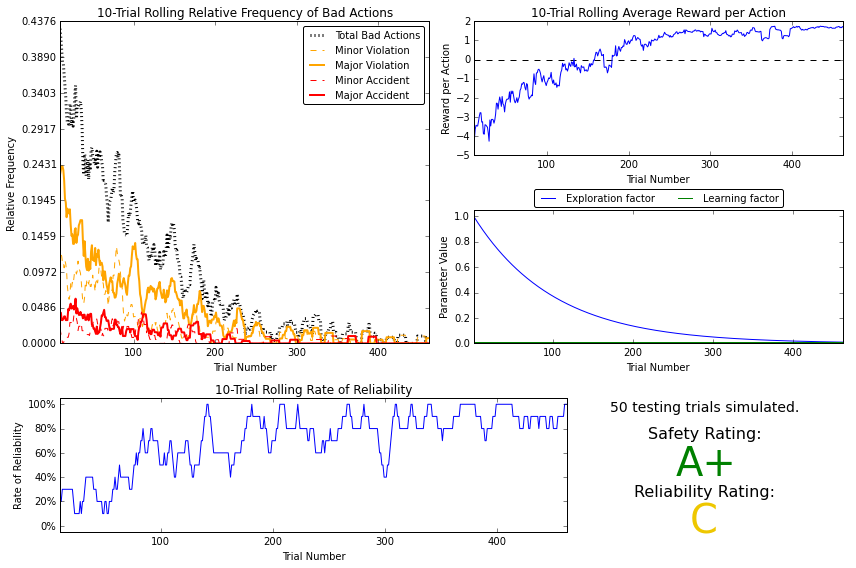

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Learning with alpha = 0.01, tolerance = 0.001, 100 testing trials

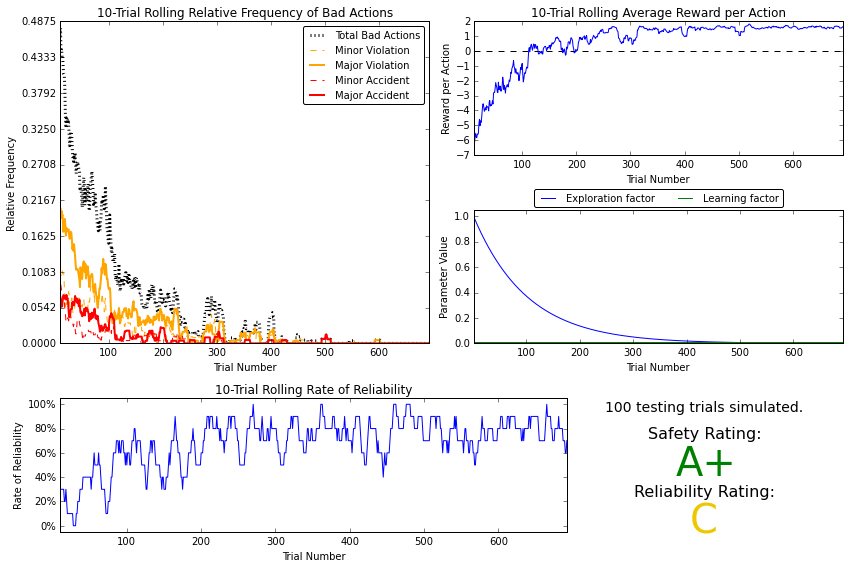

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Learning with alpha = 0.005, tolerance = 0.01, 1000 testing trials

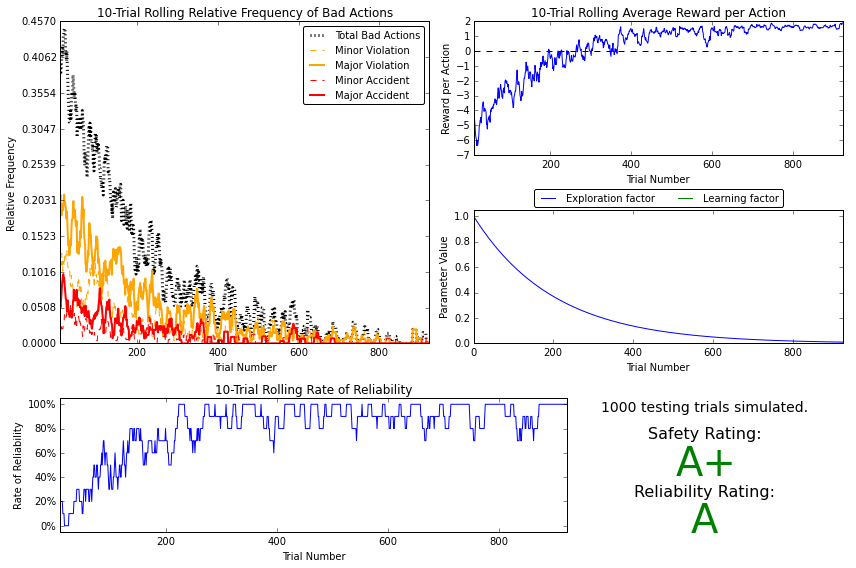

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I experimented with epsilon = 1/t^2 and epsilon = e^-at with few different value for alpha and epsilon tolerance. epsilon = e^-at was used for final learning because it gave a A+ rating for safety and A rating for efficiency. Also noted that this function have higher exploration in the initial learning trials and gradually reduced to lower exploration.

From the log files recorded, its shown that 923 training trials were needed before testing began. 1000 testing trials were used to ensure the results are reliable.

An epsilon tolerance 0.01 is used to increase the possible number of training trials and a lower value of alpha = 0.005 is also used to ensure large number of training trials and maximim exploration in the beginning, since epsilon = e^-at is used as decay function.

A lot of improvement is seen in the optimized Q-Learner compared to default Q-Learner.  Safety rating from F to A+ and Reliability rating from F to A is significant impovement.

A very good rating of A+ for safety and A for reliability after 1000 testing trials means that agent successfully lerarned an appropriate policy.

Overall i'm satisfied with the safety and reliability rating of the smart cab. My main concern was safety rating. Given that the agent managed to learn a policy that gave A+ safety rating and A reliability rating, its a good performance rating. But this may not be enough for real world smartcab, there might be many other environment inputs need to be considered. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1)Considering the agent is trying to learn U.S right-of-way traffic laws using 'waypoint', 'light', 'oncoming' and 'left' inputs, an optimal policy can be like this.

- If the light is red and waypoint is forward or left, stay idle
- If the light is red and waypoint is right, 
        - If there is no vehicle from left, then turn right
        - else stay idle
- If light is green and waypoint is forward, go forward
- If the light is green and waypoint is left,
        - If no oncoming vehicle intending to go forward or turn right , then turn left
        - else, stay idle
- If the light is green, waypoint is right,
        - turn right ( assuming an ideal condition of no pedestrians and oncoming vehicle intending to turn left will give way to right turning vehicle)
        
2) After going through the 'sim_improved-learning.txt' file, observed that for some states, the learned policy is not the optimal policy. There are few states where the action with highest value is not the expected best action for the state.

** Note: **
**    Format of state is 'state = (next waypoint, trafficlight state, intention of vehicle from left, intention of oncoming vehicle)' **

**    State-action-value dictionary is of the following format: ** 
       
**    {state : { 'forward': value, ' right': value, 'None': value, 'left':value}}  **

3)Some examples from the recorded Q-table for states that learned optimal policy:
       - ('forward', 'red', 'right', 'right')
             -- forward : -0.05
             -- right : 0.00
             -- None : 0.10
             -- left : 0.00
             
       - ('forward', 'red', 'left', None)
             -- forward : -1.23
             -- right : 0.04
             -- None : 0.99
             -- left : -1.58
             
       - ('forward', 'green', 'left', None)
             -- forward : 1.09
             -- right : 0.05
             -- None : -0.24
             -- left : 0.04


 In the first example, the agent learned that the best action to take is to stay idle because the light is 'red', by giving highest value to 'None'. This means that agent is considering Safety first. But it is to be noted that 'right' and 'left' actions have values '0.0' probably because those actions have not yet explored by the agent. 
 
 In the second example the agent learned that the best action is to stay idle at the red light not going forward or turn left. It can be seen from the highest value for 'None' and higher negetive value for 'forward' and 'left'.
 
 Third example shows the agent has learned that if the light is green and waypoint is forward, its best to move forward. Staying idle have a negative value because its not an efficient action to stay idle at green light when it is suppose to go forward.

4) An example of a state with not optimal policy learned by the agent:

      - ('left', 'green', 'left', 'forward')
             -- forward : 0.01
             -- right : 0.12
             -- None : -0.02
             -- left : -0.10
         
 Here the smartcab supposed to turn left on Green light, but the 'oncoming' vehicle is to go forward. The best action is for the smartcab to wait for the oncoming traffic to clear, then turn left. But according to the policy learned by the agent, the best action is to turn 'right'. But it can be seen that agent also learned that it is not safe to turn left, from the 'left' action having highest negetive value. The agent learned like this probably because it is giving Safety highest priority compared to reliability.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I think the feature about the smartcab that make future rewards dont work is its destination. Smartcab's destination always different. It will be almost impossible for the agent to consider all the possible destinations smartcab may have to go in the future and this will make considering future rewards to reach destination difficult. 

I think the feature about the environment that make the future reward dont work that its stochastic. THge environment that the agent using is the traffic situations on the road. It always changes. Traffic lights keep changes, movement of vehicle around the smartcab is always different. Hence its difficult for the agent to consider future states of the traffic light at a particular intersection on the way to destination. Also its difficult for the agent to guess what actions other vehicles on the road may take at different situations. Hence considering future rewards based on possible future states is difficult for the agent.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.